# Zillow Clustering Project

![](https://ryvynyoung.github.io/Zillow_map-2.pdf)

Ryvyn Young
10/21/20

<div class="alert alert-block alert-info">

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQSynqmlD9ApdDNkooH9sQg_pcD1uSns8BhyA&usqp=CAU)

**Executive Summary**

**Data Aquire and Prepare Overview**     

**Exploration Key Insights**     

**Modeling Summary**     

**Conclusions and Next Steps**     

<div class="alert alert-block alert-info">

## Executive Summary
  

**Zestimate Error Drivers**
- Confirmed driver = county based on statistical testing and recursive modeling
- Some additional expected drivers based on statistical testing: 
    - tax dollar count, structure dollar per sqft, bedroom count, finished sqft, tax rate, 
    - but these do not necessarily score as key features when using RFE to evaluate


**Best Performing Model**
- The best model was a Linear Regression using all features (excludes cluster names)
    - result is 3.6% worse than baseline


**Conclusions**
- "I have not failed. I've just found 10,000 ways that won't work." -Thomas Edison
- None of the iterations tried produced a result better than baseline on unseen data


**Possible Next Steps**
- obtain additional data on school rating and distance from beach
- reassess clusters and adjust
- reduce focus to one county
- additional feature engineering and model types






<div class="alert alert-block alert-info"><b>

## Description: 
- Zillow: What is driving the errors in the Zestimates?
- The presentation will consist of a notebook demo of the discoveries you made and work you have done related to uncovering what the drivers of the error in the zestimate is.

## Problem Statement
- What is driving the error in the Zestimate (logerror)?
- Are there features that will produce a smaller average error?
- What groups are in the data?
- Does using these groups help remove the noise in the model?

#### Domain Research
- What is a single unit housing unit?
    - https://www.investopedia.com/terms/h/housingunits.asp
- What is fips?
    - https://en.wikipedia.org/wiki/FIPS_county_code
- What is the min/max tax rate by county in US?
    - https://www.attomdata.com/news/market-trends/figuresfriday/top-10-u-s-counties-with-the-greatest-effective-tax-rates/
- Understanding Zillow Zestimate
    - https://www.zillow.com/zestimate/
    - https://www.youtube.com/watch?v=rfWzMI_VwTQ
    - https://www.kaggle.com/c/zillow-prize-1/overview


**MVP Questions to answer:**
- Use clustering to identify new features
- Determine the baseline logerror
- Produce a model that has less logerror than baseline
- Determine key drivers of error

**Brainstorm:**    
- MVP all counties
- features to add:
    - county name column, remove fips, get dummies for clustering use
    - combined bedroom/bathroom ratio? drop bathroom, keep bedroom
    - cluster on size with lot size, finished sq ft, and ????
    - convert year build to age (current date - yearbuilt)
    - does age correlate with size? if so maybe cluster age with size columns above
    - cluster on tax value? taxamount, taxvaluedollarcnt, landtaxvaluedollarcnt, structuretaxvaluedollarcnt?
- 2nd run add tax percent rate column and remove outliers above 6.6% and below 1% 
    - first outlier method removed too many observations, this was done instead
    
- 2nd run through seperate models by county?


Audience: Zillow Data Science Team    
Setting: Professional


<div class="alert alert-block alert-info"><b>

## Acquire
DELIVERABLES: 
- Data is collected from the Codeup cloud database with an appropriate SQL query
- Define single unit property

Summary of query requirements and creation:
- get all single unit properties, all tables and values from Codeup Zillow database with a transaction date in 2017, but only the most recent transaction date in 2017 and only for those with latitude and longitude

****
Defining single housing unit   

**This is definition used in previous project**   

"The term housing unit refers to a single unit within a larger structure that can be used by an individual or household to eat, sleep, and live. The unit can be in any type of residence such as a house, apartment, mobile home, or may also be a single unit in a group of rooms."
https://www.investopedia.com/terms/h/housingunits.asp   

**In my opinion deffinition should include condo, townhouse, any unit that can be sold to an individual owner. So my deffinition will include townhouse, condo, ect. but not commercial, business, land only, etc.**   

This site has the property use codes for LA county https://www.titleadvantage.com/mdocs/LA%20County%20Use%20Codes%20nm.pdf   
looking at the common use codes for Duplex, Triplex, and Quadplex these codes indicate the units are multi-family/income properties or retail/store properties so these will be excluded

Identify Properties in the Database: Based on the above definition some categories do not fit brief   
Propertylandusetypeid | propertylandusedesc    
No 31 Commercial/Office/Residential Mixed Used (not a residence)    
No 46 Multi-Story Store (not a residence)   
No 47 Store/Office (Mixed Use) (not a residence)    
No 246 Duplex (2 Units, Any Combination)    
No 247 Triplex (3 Units, Any Combination)   
No 248 Quadruplex (4 Units, Any Combination)   
260 Residential General    
261 Single Family Residential   
262 Rural Residence   
263 Mobile Home   
264 Townhouse   
No 265 Cluster Home    
266 Condominium    
No 267 Cooperative (become shareholder not owner)   
268 Row House       
No 269 Planned Unit Development   
No 270 Residential Common Area (propterty feature)    
No 271 Timeshare (become shareholder not owner)    
273 Bungalow      
274 Zero Lot Line   
275 Manufactured, Modular, Prefabricated Homes   
276 Patio Home    
279 Inferred Single Family Residential      
No 290 Vacant Land - General (not a residence)   
No 291 Residential Vacant Land (not a residence)   

So we will keep only those where propertylandusetypeid = ('260', '261', '262', '263', '264', '266', '268', '273', '274', '275', '276', '279')  

**acquire function updated to filter only for these**
new shape = (71789, 70)

<div class="alert alert-block alert-info">

In [1]:
import wrangle_zillow

df, X_train, y_train, X_validate, y_validate, X_test, y_test,\
X_train_scaled, X_validate_scaled, X_test_scaled, X_train_exp = wrangle_zillow.wrangle_zillow_cluster()
# prints shape of X and X scaled dataframes

acquire data shape= (71789, 70)
prepare data shape= (62291, 30)
(34882, 22) (14950, 22) (12459, 22)
(34882, 19) (14950, 19) (12459, 19)


<div class="alert alert-block alert-info">

## Preparation
DELIVERABLES:
- Column data types are appropriate for the data they contain
- Missing values are investigated and handled
- Outliers are investigated and handled

Summary of handling nulls, outliers, creating additional features, dropping columns/rows:
1. remove unnecessary duplicated id and tdate columns
2. drop rows and columns that are missing more than 50% of values
3. add a county name column and get dummies for counties
4. remove duplicate columns and those with too many nulls for useful info(heatingsystemtypeid, buildingqualitytypeid, calculatedbathnbr,etc.
5. fill remaining nulls in unitcnt with 1 (all units must be minimum of 1 unit)
6. initially calculated outliers based on IQR (see next 2 cells)
    - decided this eliminated too much data so switch to removing outliers with a tax rate above 6.6% or below 1% based on domain research
    - based on explore visualizations of calculated finished sqft and lot size sqft also removed finished sqft above 7000 and lotsize above 2,000,000
7. added features: age, tax rate, bed/bath ratio, structure dollars/sqft, land dollars/sqft
8. dropped remaining null values (lot size and land dollars were largest remaining columns with 7663 each)
9. split dataset into X and y versions of train, validate, test
10. drop duplicate value columns not needed for explore or modeling
11. created scaled datasets for X train, X validate, and X test
12. create X explore dataset with target added back in for exploration and hypothesis testing

MVP - used taxamount to determine cutoff for outliers    
for 2nd round might add calculated tax rate column and use that for cut off instead.  
**Upperbound Outliers to HANDLE**   

**taxamount_outliers**     
count      4894.000000     
mean      10979.609790     
std       20235.975915     
min           0.830000     
25%        1997.677500     
50%        5367.625000     
75%       12289.405000     
max      573508.600000     
Name: taxamount_outliers, dtype: float64     
    
*******
**based on the above info drop upperbound outliers that are above 50th percentile of upperbound outliers**

reasoning: there is a significant jump from the 25th to 50th percentile making this a logical place to start removing outliers while still keeping some outliers above the upperbound

**Lowerbound Outliers to HANDLE**

**taxamount_outliers**     
count    68981.000000    
mean      8203.408061    
std       3350.880803    
min       3210.485000    
25%       5817.075000    
50%       7473.745000    
75%       9695.125000    
max      21685.205000    
Name: taxamount_low_outliers, dtype: float64                  
   
*******
**based on the above drop rows that are above the 75th lowerbound percentile**

reasoning: there is a significant jump from the 50th to 75th percentile making this a logical place to start removing outliers while still keeping some outliers above the lowerbound

(62291, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62291 entries, 0 to 71788
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      62291 non-null  int64  
 1   bathroomcnt                   62291 non-null  float64
 2   bedroomcnt                    62291 non-null  float64
 3   calculatedfinishedsquarefeet  62291 non-null  float64
 4   fips                          62291 non-null  float64
 5   fullbathcnt                   62291 non-null  float64
 6   latitude                      62291 non-null  float64
 7   longitude                     62291 non-null  float64
 8   lotsizesquarefeet             62291 non-null  float64
 9   rawcensustractandblock        62291 non-null  float64
 10  regionidcounty                62291 non-null  float64
 11  regionidzip                   62291 non-null  float64
 12  roomcnt                       62291 non-null  fl

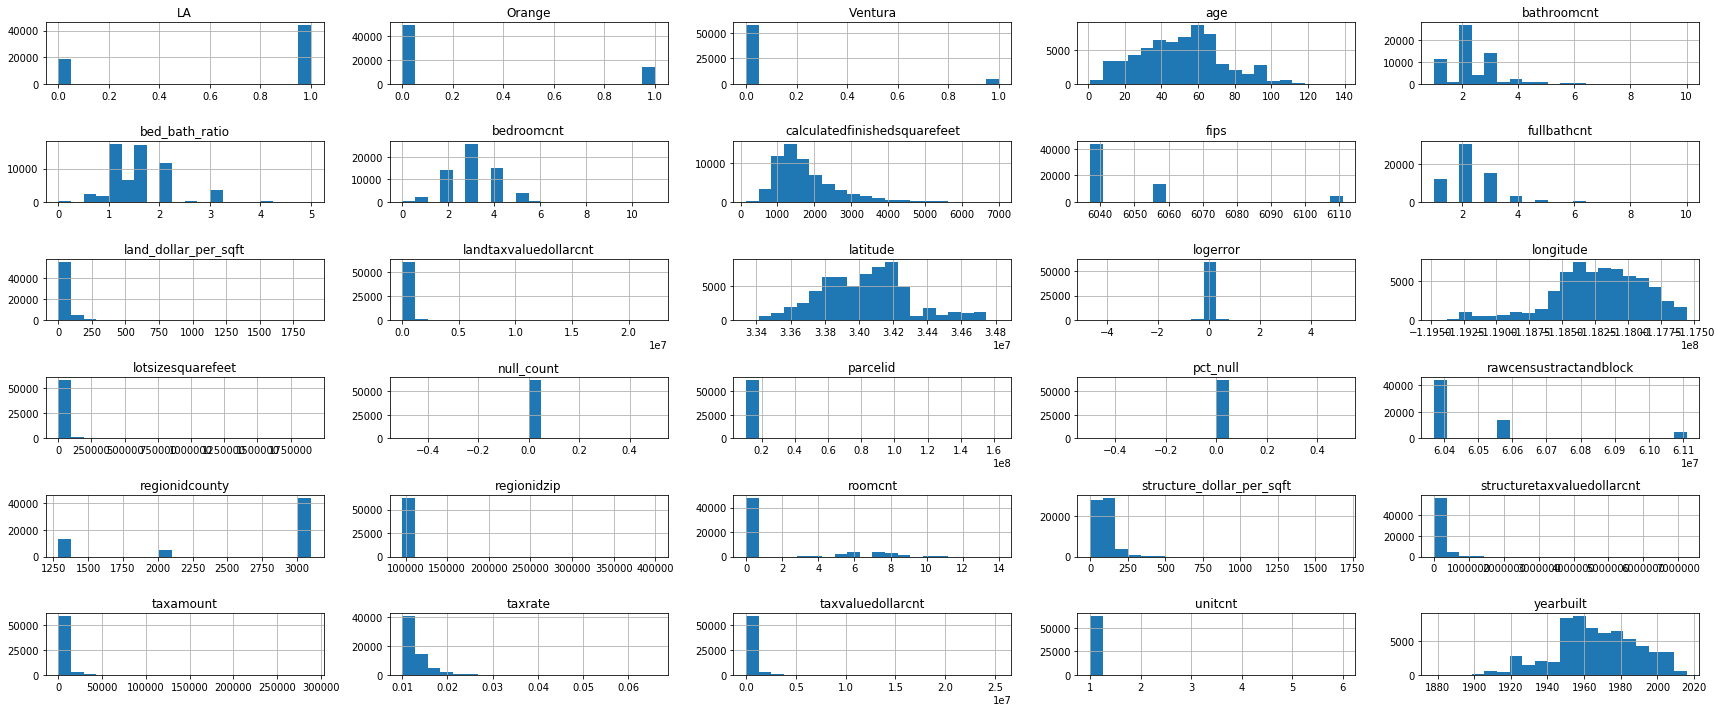

None [[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81859e3190>
  <matplotlib.axes._subplots.AxesSubplot object at 0x7f8186b03c90>]] None


In [2]:
# During this stage called this summary function to assist in seeing remain nulls to handle and
# for histograms of individual variables.
# Can be used for full dataframe or any of the split or scaled dataframes
import summarize

fulldf = summarize.df_summary(df)

<div class="alert alert-block alert-info">

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import explore

## Exploration
DELIVERABLES:      
- Interaction between independent variables and the target variable is explored using visualization and statistical testing
- Clustering is used to explore the data
- A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful
- At least 3 combinations of features for clustering should be tried

### Interaction between independent and target variable
Use loop to iterate through sns.scatterplot of each independent variable against the target (logerror)

*****
**Take aways from visualizations**
1. Orange county appears to have largest spread in logerror: 2 possible factors not in dataset
    - perceived value of properties due to "wealth" of county
    - perceived value based public school rankings
2. unit count should is nearly all 1, so does not add value in any county
2. age and calculated sqft have a wide spread in error
3. lot size has a wide spread in error for small size lots, may need to not use this feature?
4. room count for LA county appears to be all 0 or 1, so not useful for that county

****

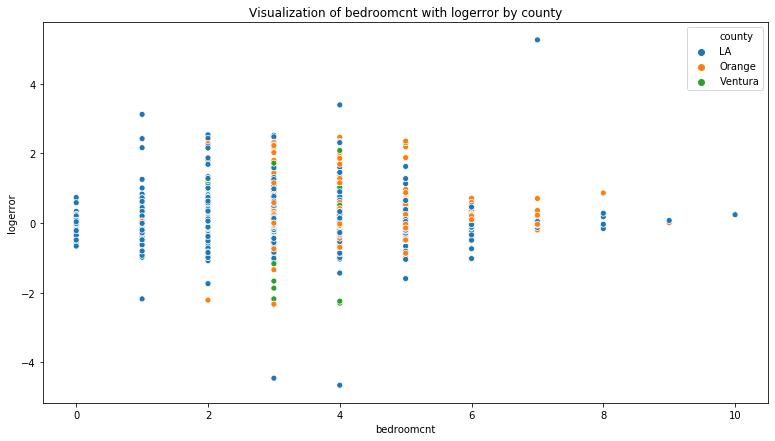

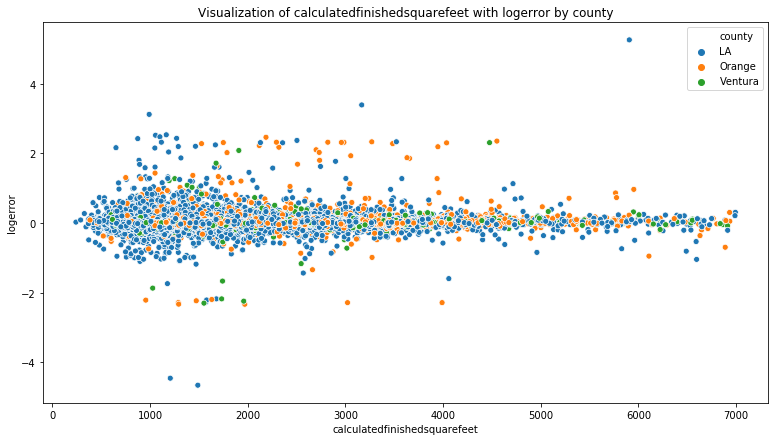

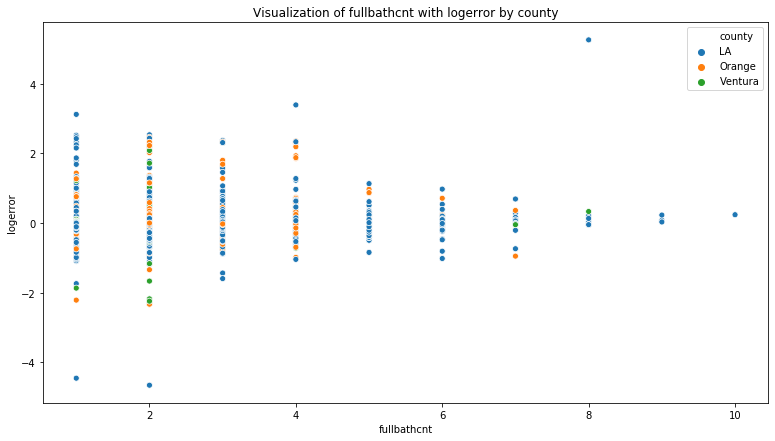

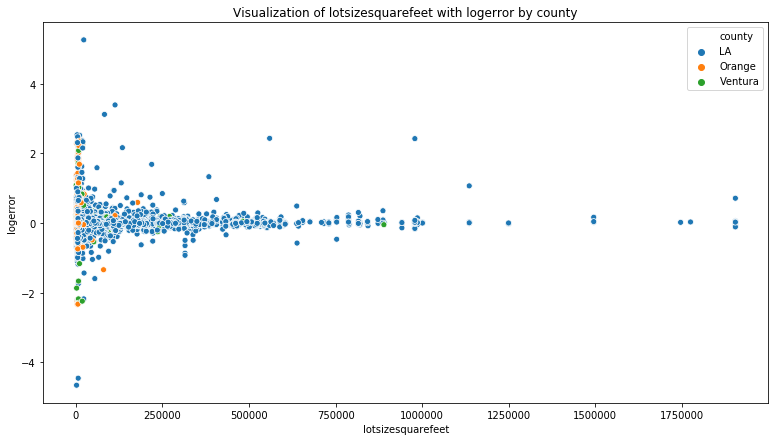

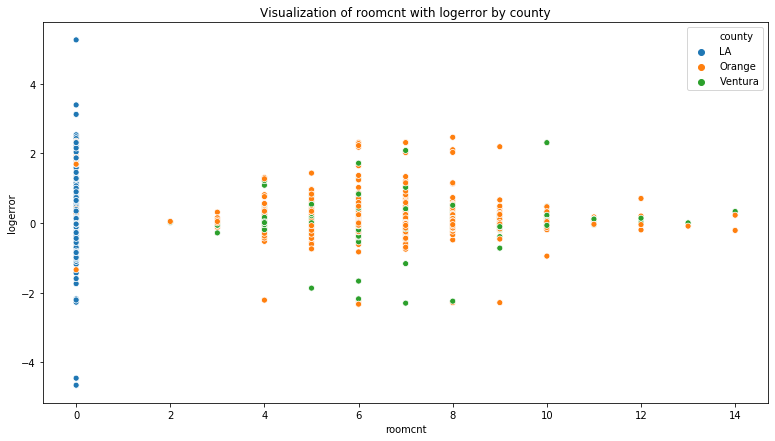

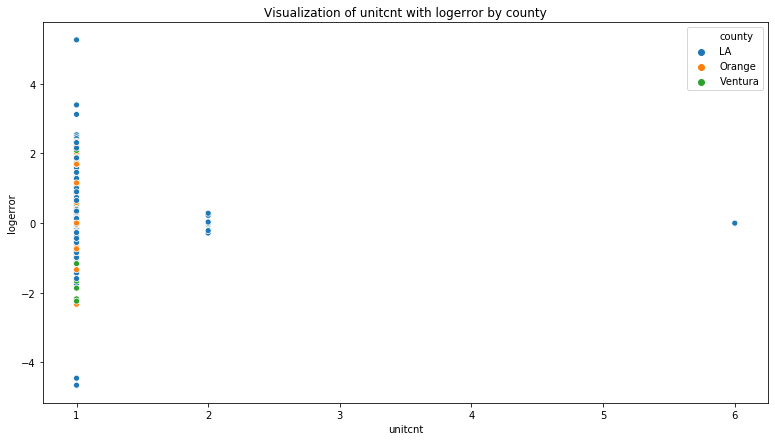

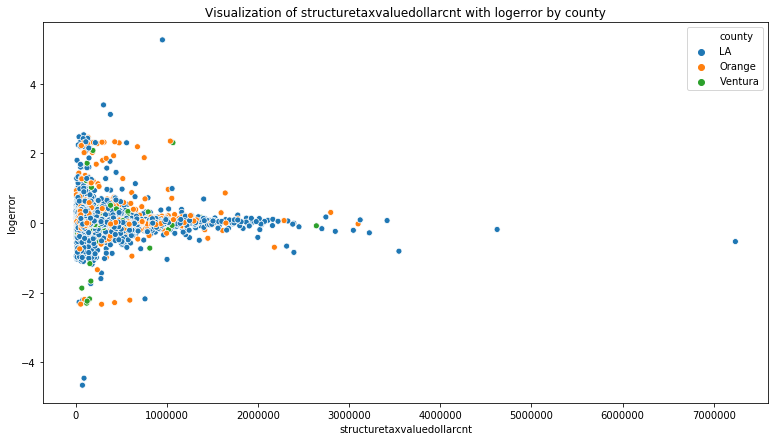

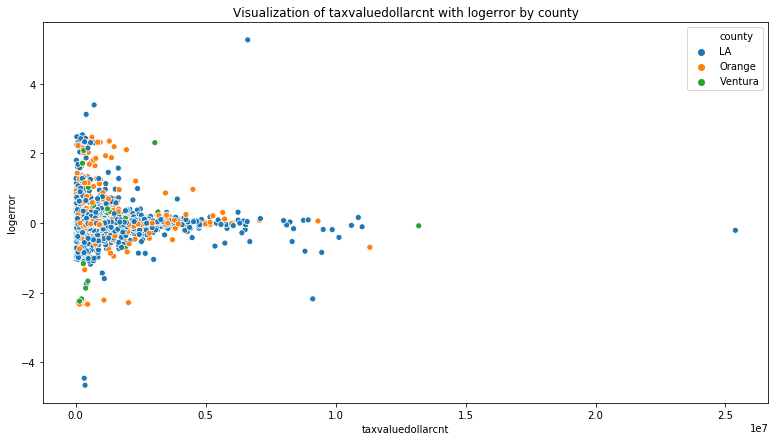

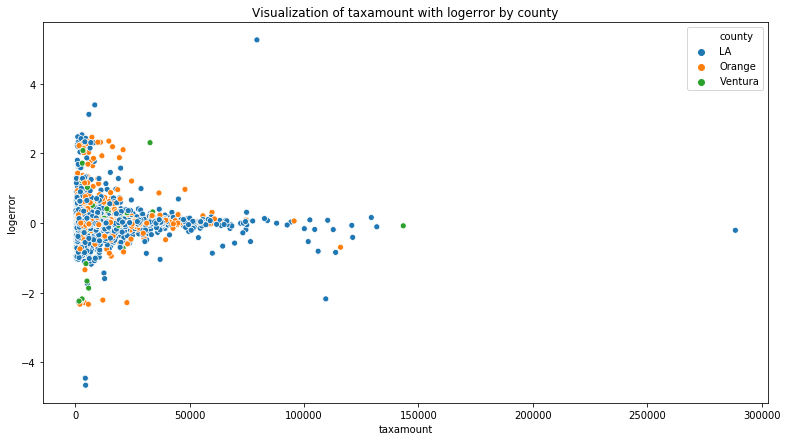

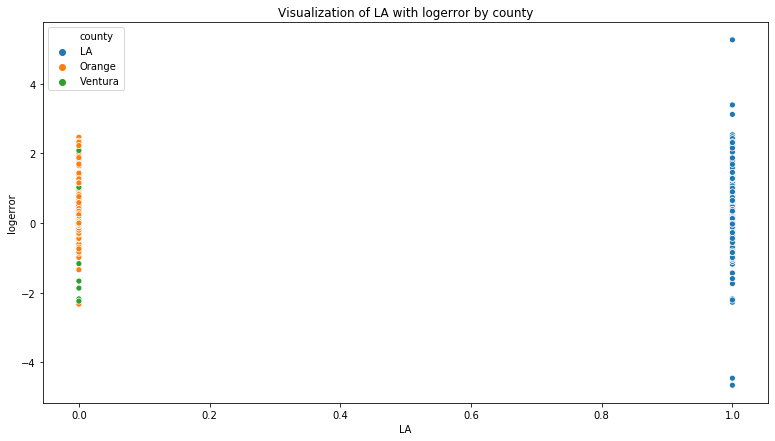

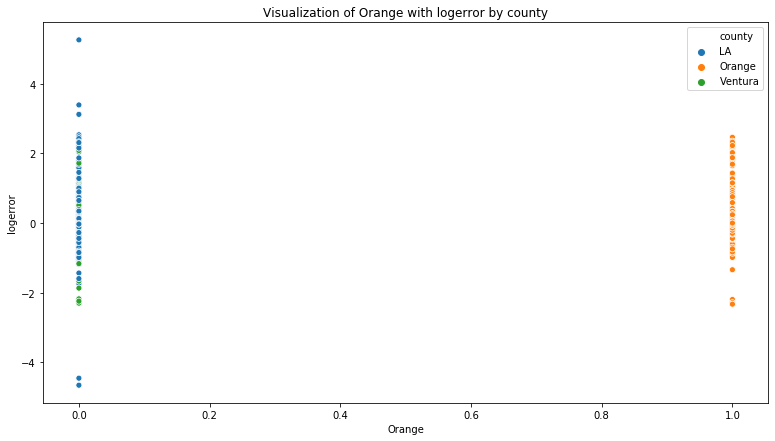

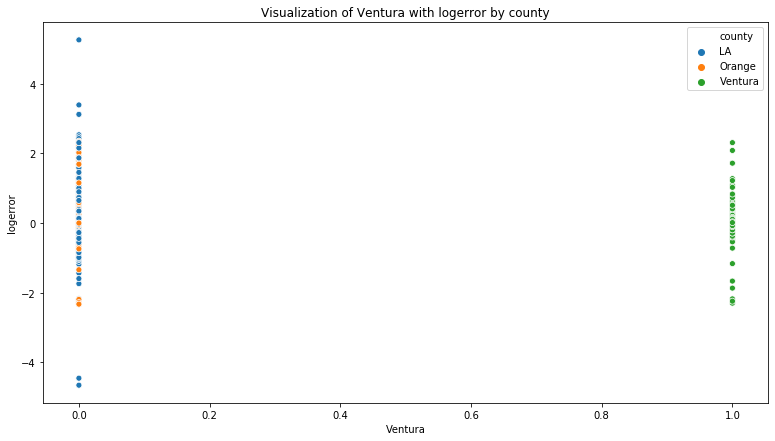

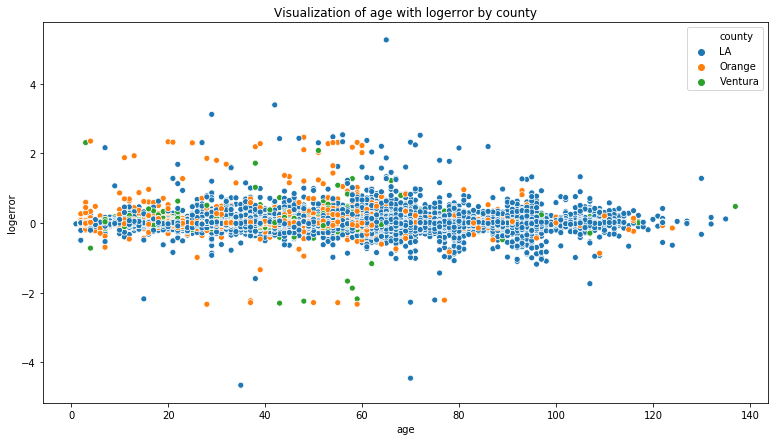

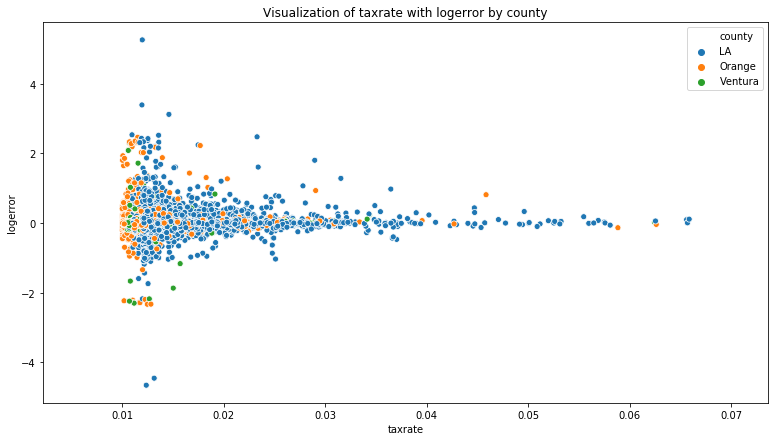

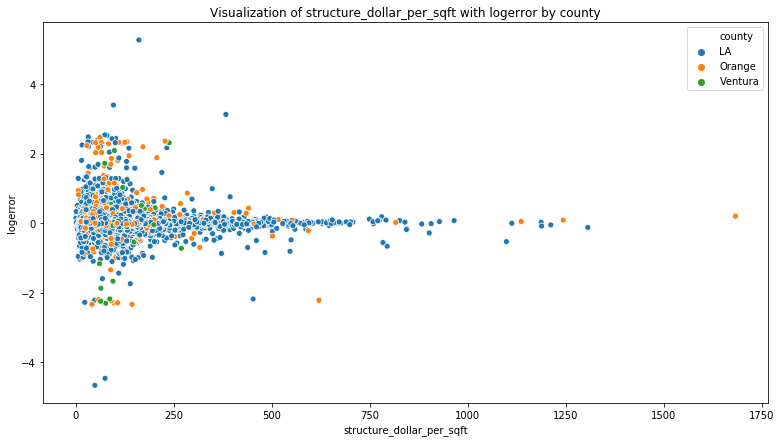

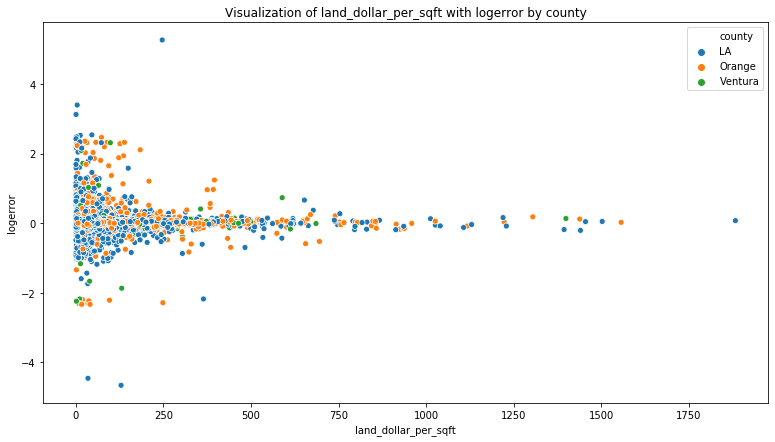

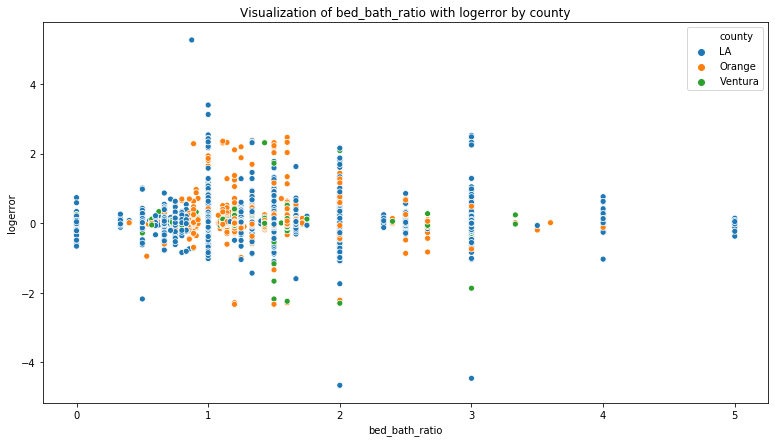

In [4]:
# create loop to make plots of features with target

columns_list = ['bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'lotsizesquarefeet', 'roomcnt', 
             'unitcnt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount', 'LA', 'Orange', 
             'Ventura', 'age', 'taxrate', 'structure_dollar_per_sqft', 'land_dollar_per_sqft', 
           'bed_bath_ratio']

indep_target_vis = explore.indep_target_vis(X_train_exp, columns_list)


In [5]:
# setup for Pearson's R statistical tests between continuous variables
# create loop to run test and produce visual of results
# would like to move this to function 

vars2test = ['bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'lotsizesquarefeet', 'roomcnt', 
             'unitcnt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount', 'LA', 'Orange', 
             'Ventura', 'age', 'taxrate', 'structure_dollar_per_sqft', 'land_dollar_per_sqft', 'bed_bath_ratio']
r_value = []
p_value = []
continuous_var2 = X_train_exp.logerror
for i in vars2test:
    continuous_var1 = X_train_exp[i]
    r, p = explore.pearson(continuous_var1, continuous_var2)
    r_value.append(r)
    p_value.append(p)


stats_list = ['bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'lotsizesquarefeet', 'roomcnt', 
             'unitcnt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount', 'LA', 'Orange', 
             'Ventura', 'age', 'taxrate', 'structure_dollar_per_sqft', 'land_dollar_per_sqft', 'bed_bath_ratio']

null_list = []
for p in p_value:
    if p < .05:
        null_list.append('reject Ho')
    else:
        null_list.append('fail to reject Ho')
        
stat_res = pd.DataFrame(stats_list, columns=['Feature'])
stat_res['r_value'] = r_value
stat_res['p_value'] = p_value
stat_res['hypothesis'] = null_list
stat_res

,Feature,r_value,p_value,hypothesis
0,bedroomcnt,0.035380,3.850102e-11,reject Ho
1,calculatedfinishedsquarefeet,0.037503,2.443041e-12,reject Ho
2,fullbathcnt,0.032519,1.240641e-09,reject Ho
3,lotsizesquarefeet,0.006910,1.968467e-01,fail to reject Ho
4,roomcnt,0.011884,2.644677e-02,reject Ho
5,unitcnt,0.000042,9.937453e-01,fail to reject Ho
6,structuretaxvaluedollarcnt,-0.000101,9.849510e-01,fail to reject Ho
7,taxvaluedollarcnt,-0.013339,1.272639e-02,reject Ho
8,taxamount,-0.015497,3.797906e-03,reject Ho
9,LA,-0.021508,5.886169e-05,reject Ho


### Hypothesis Testing with target variable

Is the average logerror significantly different by county?     
Ho: The logerror is not significantly different for properties in LA vs Orange vs Ventura counties    
Ha: The logerro is significantly different      
    
We will check the variances with a levene test to see if the ANOVA or Kruskal test should be used

**Take Aways**     

Kruskal test the pvalue is < .05 so we would reject the Ho and conclude that there is a significant difference in logerror by county      

NOTE: this just shows 1 or more are different but does not indicate that all 3 are significantly different from each other, 2 may be same



In [6]:
# What is the actual average logerror by county?
print('mean LA logerror =', X_train_exp[X_train_exp.county == "LA"].logerror.mean())
print('mean Orange logerror=', X_train_exp[X_train_exp.county == "Orange"].logerror.mean())
print('mean Ventura logerror=', X_train_exp[X_train_exp.county == "Ventura"].logerror.mean())

mean LA logerror = 0.013630163996905184
mean Orange logerror= 0.023082153403727955
mean Ventura logerror= 0.01618997837928995


In [7]:
# This creates the variables we need for testing
alpha = .05

LA = X_train_exp[X_train_exp.county == "LA"].logerror
Orange = X_train_exp[X_train_exp.county == "Orange"].logerror
Ventura = X_train_exp[X_train_exp.county == "Ventura"].logerror

# check the variances 
print(stats.levene(LA, Orange, Ventura))
# with a p value < .05 the variances are not similar enough for the ANOVA test
# will use scipy.stats.kruskal

print(stats.kruskal(LA, Orange, Ventura))

LeveneResult(statistic=10.77112097439938, pvalue=2.106714013095404e-05)
KruskalResult(statistic=32.17985298660225, pvalue=1.0285696601403194e-07)


**Is the difference in average log error between LA and Orange county significant?**       
Ho: There is no significant difference in the average logerror between LA and Orange counties      
Ha: There is a significant difference in the average logerror between LA and Orange counties      
**Take Away**     
The p is less than alpha so we reject the null hypothesis and conclude that there is a signficant difference between the mean logerror of LA and Orange counties

**Is the difference in average log error between LA and Ventura county significant?**.      
Ho: There is no significant difference in the average logerror between LA and Ventura counties      
Ha: There is a significant difference in the average logerror between LA and Ventura counties    
**Take Away**     
The p is greater than alpha so we fail to reject the null hypothesis and conclude that there is not a signficant difference between the mean logerror of LA and Ventura counties.

**Is the difference in average log error between Ventura and Orange county significant?**       
Ho: There is no significant difference in the average logerror between Ventura and Orange counties      
Ha: There is a significant difference in the average logerror between Ventura and Orange counties   
**Take Away** 
The p is greater than alpha so we fail to reject the null hypothesis and conclude that there is not a signficant difference between the mean logerror of Ventura and Orange counties.

For these we use a two sample, two tailed t-test

In [8]:
# check the variances
print(stats.levene(LA, Orange))
print(stats.levene(LA, Ventura))
print(stats.levene(Ventura, Orange))

LeveneResult(statistic=12.425121913913705, pvalue=0.0004241844690810299)
LeveneResult(statistic=13.430226127783458, pvalue=0.0002480714931995312)
LeveneResult(statistic=1.0379017065072846, pvalue=0.308333971151766)


In [9]:
# run the tests
t, p = stats.ttest_ind(LA, Orange, equal_var=False)
print('LA vs Orange')
print("p = ", p)
print("t = ", t)

t, p = stats.ttest_ind(LA, Ventura, equal_var=False)
print('LA vs Ventura')
print("p = ", p)
print("t = ", t)

t, p = stats.ttest_ind(Ventura, Orange, equal_var=True)
print('Ventura vs Orange')
print("p = ", p)
print("t = ", t)

LA vs Orange
p =  3.638969052106357e-05
t =  -4.130907194148914
LA vs Ventura
p =  0.41516539554001086
t =  -0.8149398690369545
Ventura vs Orange
p =  0.07658987269844643
t =  -1.7710028368778075


**Take aways**      
Based on these results the following should be drivers of logerror:
    - bedroomcnt, calculatedfinishedsquarefeet, fullbathcnt, roomcnt, taxvaluedollarcnt, taxamount, LA, Orange, age, taxrate, structure_dollar_per_sqft, land_dollar_per_sqft 

### Create Clusters

#### Cluster 1 = size_cluster
##### Does age correlate with size?
1. decided to use calculatedfinishedsquarefeet for size to answer this
2. visualize age and size together (both continuous variables)
3. use scatter plot for chart
4. use stats.pearsonr for hypothesis testing

##### Hypothesis test
Ho: There is no relationship between age and size.     
Ha: There is a relationship between age and size.     
**Take aways**     
The p-value is less than alpha so we reject the null hypothesis, though the r value is not far from zero and is negative, which would indicate a weak negative linear correlation. 

Given the visual it may be better to separate by county and retest in next iteration

**Take away**      
Based on correlation of age and size (though weak) will try clustering on calculatedfinishedsquarefeet, lotsizesquarefeet, and age.    
This produced a very slight improvement over baseline. Removing age from this cluster to see impact.     
No effect when age removed from this cluster, so leaving it out of this cluster.

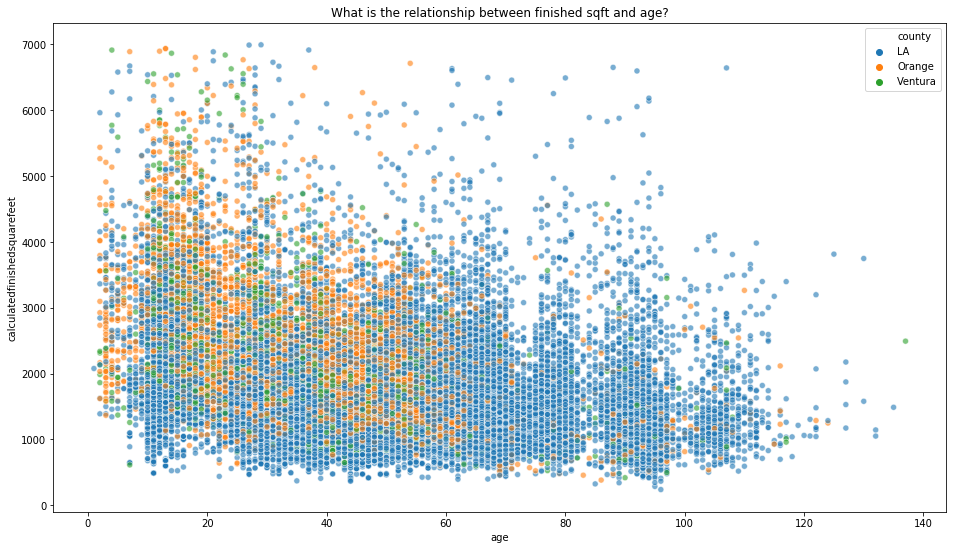

In [10]:
# visualize relationship between age and size
plt.figure(figsize=(16, 9))
sns.scatterplot(data=X_train_exp, y='calculatedfinishedsquarefeet', x='age', hue='county', alpha=.6)
plt.title('What is the relationship between finished sqft and age?')
plt.show()

In [11]:
# test hypothesis
continuous_var1 = X_train.age
continuous_var2 = X_train.calculatedfinishedsquarefeet
r, p = explore.pearson(continuous_var1, continuous_var2)

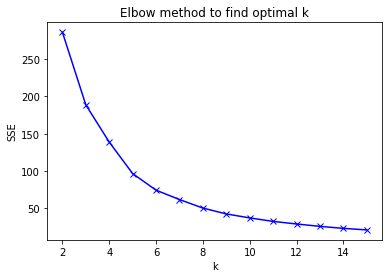

In [12]:
# Determine best value for K
cluster_vars = ['calculatedfinishedsquarefeet_scaled', 'lotsizesquarefeet_scaled']
explore.elbow_plot(X_train_scaled, cluster_vars)
# based on this will use 6 as k value
# if time would reduce this to 3 and rerun

In [13]:
# set K value, get clusters and view dispersal
k=6
cluster_col_name = 'size_cluster'
train_clusters, kmeans = explore.run_kmeans(X_train_scaled, X_train, cluster_vars, k, cluster_col_name)
train_clusters.size_cluster.value_counts()
# so so dispersal of values

0    12110
3    11787
1     6509
4     3061
2      744
5      671
Name: size_cluster, dtype: int64

In [14]:
# get the centroids and add all to train and scaled datasets
centroids = explore.get_centroids(kmeans, cluster_vars, cluster_col_name)
X_train, X_train_scaled = explore.add_to_train(X_train, train_clusters, X_train_scaled, centroids, cluster_col_name)
val_trans_clusters = explore.kmeans_transform(X_validate_scaled, kmeans, cluster_vars, cluster_col_name)
test_trans_clusters = explore.kmeans_transform(X_test_scaled, kmeans, cluster_vars, cluster_col_name)
X_validate, X_validate_scaled = explore.add_to_train(X_validate, val_trans_clusters, X_validate_scaled, centroids, cluster_col_name)
X_test, X_test_scaled = explore.add_to_train(X_test, test_trans_clusters, X_test_scaled, centroids, cluster_col_name)

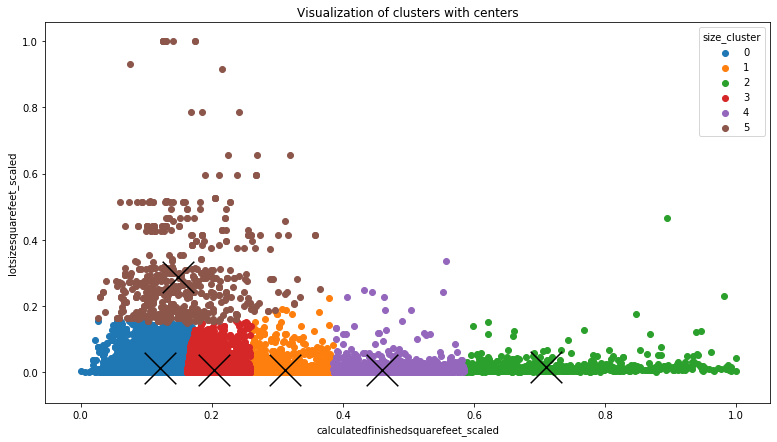

In [15]:
# Visualize clusters
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in X_train_scaled.groupby('size_cluster'):
    ax.scatter(subset.calculatedfinishedsquarefeet_scaled, subset.lotsizesquarefeet_scaled, label=cluster)
ax.legend(title='size_cluster')
ax.set(ylabel='lotsizesquarefeet_scaled', xlabel='calculatedfinishedsquarefeet_scaled')

X_train_scaled.groupby('size_cluster').mean().plot.scatter(y='lotsizesquarefeet_scaled', x='calculatedfinishedsquarefeet_scaled', marker='x', s=1000, ax=ax, c='black')
plt.title('Visualization of clusters with centers')
plt.show()

### Cluster creation summary

- 4 groups of clusters created
- combined features that logically seemed to go together
    - size cluster = calculated finished sqft and lot size sqft
    - dollar cluster = all features tied to dollar value (tax amount, structural dollars per sqft, etc.)
    - rooms cluster = bedrooms count, bed/bath ratio, room count, full bath count
    - location cluster = longitutde, latitude, and age
    
Notebook has visualizations and statistcal analysis but left out of slides for time

#### Cluster 2 = dollar_cluster     

Will combining all dollar amount features be useful?

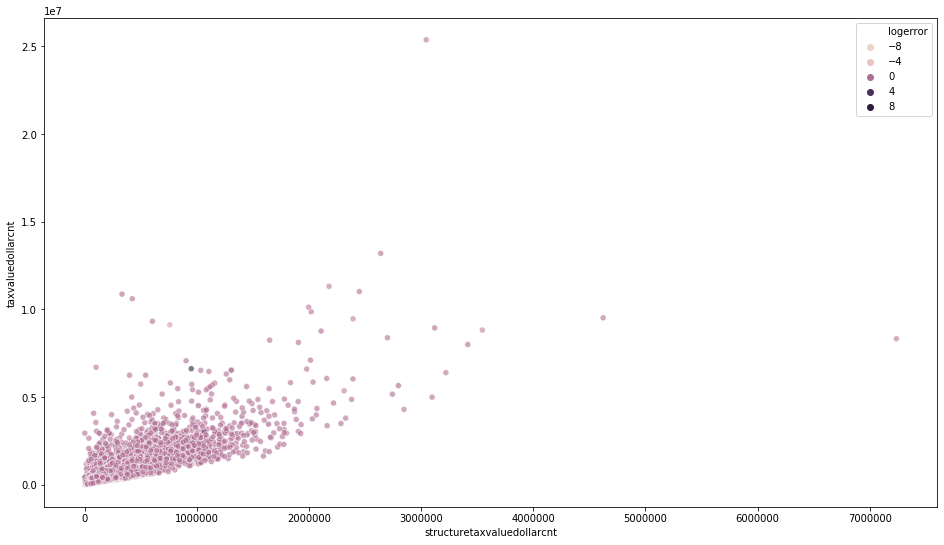

In [16]:
# Interaction of structuretaxvaluedollarcnt and taxvaluedollarcnt with target?
plt.figure(figsize=(16, 9))
sns.scatterplot(data=X_train_exp, x='structuretaxvaluedollarcnt', y='taxvaluedollarcnt', hue='logerror', alpha=.6)

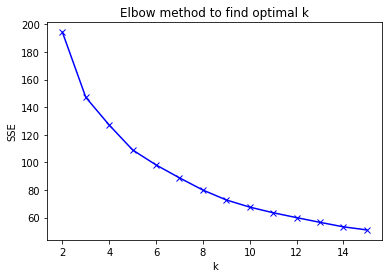

In [17]:
# use structuretaxvaluedollarcnt, taxvaluedollarcnt, taxamount, structure_dollar_per_sqft, land_dollar_per_sqft, taxrate
cluster_vars2 = ['structuretaxvaluedollarcnt_scaled', 'taxvaluedollarcnt_scaled', 'taxamount_scaled','structure_dollar_per_sqft_scaled', 'land_dollar_per_sqft_scaled', 'taxrate_scaled']
explore.elbow_plot(X_train_scaled, cluster_vars2)
# based on this will use 5 as k value

In [18]:
# set K value, get clusters and view dispersal
k2=5
cluster_col_name2 = 'dollar_cluster'
train_clusters2, kmeans2 = explore.run_kmeans(X_train_scaled, X_train, cluster_vars2, k2, cluster_col_name2)
train_clusters2.dollar_cluster.value_counts()
# based on this distribution this clustering may not be that helpful

0    22972
3     5813
4     5075
2      587
1      435
Name: dollar_cluster, dtype: int64

In [19]:
# get the centroids and add all to train and scaled datasets
centroids2 = explore.get_centroids(kmeans2, cluster_vars2, cluster_col_name2)
X_train, X_train_scaled = explore.add_to_train(X_train, train_clusters2, X_train_scaled, centroids2, cluster_col_name2)
val_trans_clusters2 = explore.kmeans_transform(X_validate_scaled, kmeans2, cluster_vars2, cluster_col_name2)
test_trans_clusters2 = explore.kmeans_transform(X_test_scaled, kmeans2, cluster_vars2, cluster_col_name2)
X_validate, X_validate_scaled = explore.add_to_train(X_validate, val_trans_clusters2, X_validate_scaled, centroids2, cluster_col_name2)
X_test, X_test_scaled = explore.add_to_train(X_test, test_trans_clusters2, X_test_scaled, centroids2, cluster_col_name2)

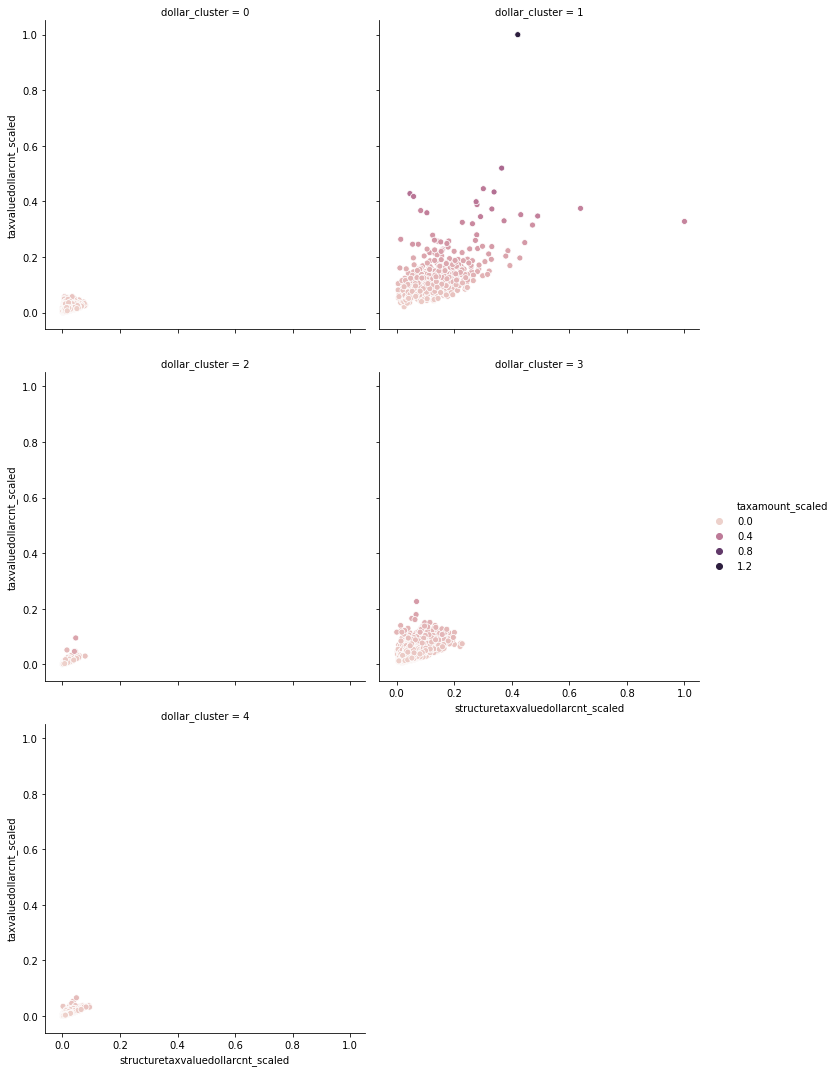

In [20]:
# visualize the clusters
sns.relplot(x="structuretaxvaluedollarcnt_scaled", y="taxvaluedollarcnt_scaled", hue="taxamount_scaled", 
            col="dollar_cluster", col_wrap=2, data=X_train_scaled)

#### Cluster 3 = rooms cluster

##### Does bed/bath ratio correlate with age?
1. visualize bed_bath_ratio and age together (both continuous variables)
2. use scatter plot for chart
3. based on chart bin bed_bath ratio and age and visualize
4. use chi squared test to compare 

Based on visualization maybe binning these features would work better?

##### Hypothesis test
Ho: Bed_bath_ratio and age are independent.     
Ha: Bed_bath_ratio and age are dependent.

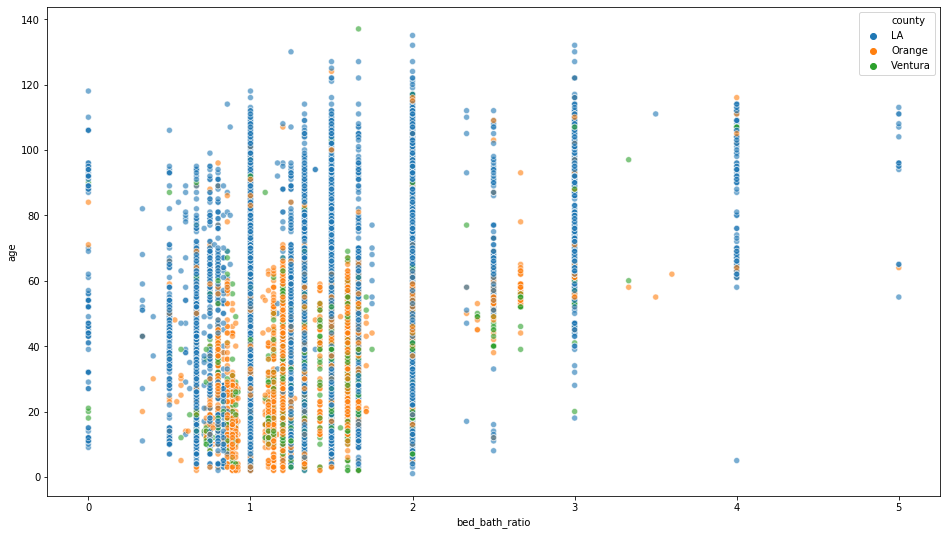

In [21]:
# Visualize the relationship between bed/bath ratio with age to see if any relationship
plt.figure(figsize=(16, 9))
sns.scatterplot(data=X_train, y='age', x='bed_bath_ratio', hue='county', alpha=.6)

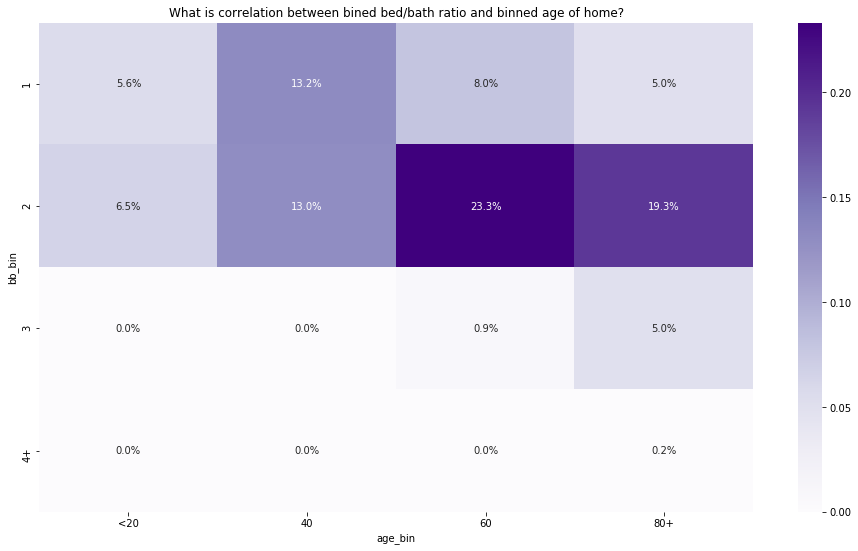

In [22]:
# create binned bed_bath_ratio column
X_train['bb_bin'] = pd.cut(X_train.bed_bath_ratio, bins=[0, 1, 2, 3, 4], labels=['1', '2', '3', '4+'])
# create binned age column by 20 yr groups
X_train['age_bin'] = pd.cut(X_train.age, bins=[0, 20, 40, 60, 80], labels=['<20', '40', '60', '80+'])
# visualize these 2 categorical variables together
# Heatmap of bined values (Categorical and Categorical)
plt.figure(figsize=(16,9))
ctab = pd.crosstab(X_train.bb_bin, X_train.age_bin, normalize=True)
sns.heatmap(ctab, cmap='Purples', annot=True, fmt='.1%')
plt.title('What is correlation between bined bed/bath ratio and binned age of home?')
plt.show()

In [23]:
# Hypothesis Test
categorical_var1 = X_train.bb_bin
categorical_var2 = X_train.age_bin
p = explore.chi2test(categorical_var1, categorical_var2)

We reject the null hypothesis
p     = 0.0000


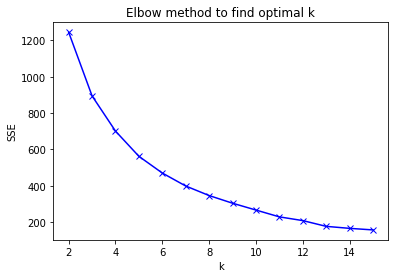

In [24]:
# create rooms cluster
# use bedroomcnt, fullbathcnt, roomcnt, structure_dollar_per_sqft, land_dollar_per_sqft, taxrate
cluster_vars3 = ['bedroomcnt_scaled', 'fullbathcnt_scaled', 'roomcnt_scaled', 'bed_bath_ratio_scaled']
explore.elbow_plot(X_train_scaled, cluster_vars3)
# based on this will use 6 as k value

In [25]:
# set K value, get clusters and view dispersal
k3=6
cluster_col_name3 = 'rooms_cluster'
train_clusters3, kmeans3 = explore.run_kmeans(X_train_scaled, X_train, cluster_vars3, k3, cluster_col_name3)
train_clusters3.rooms_cluster.value_counts()
# pretty good dispersal of values

1    8548
0    7887
4    5664
2    5220
5    4680
3    2883
Name: rooms_cluster, dtype: int64

In [26]:
# get the centroids and add all to train and scaled datasets
centroids3 = explore.get_centroids(kmeans3, cluster_vars3, cluster_col_name3)
val_trans_clusters3 = explore.kmeans_transform(X_validate_scaled, kmeans3, cluster_vars3, cluster_col_name3)
test_trans_clusters3 = explore.kmeans_transform(X_test_scaled, kmeans3, cluster_vars3, cluster_col_name3)
X_train, X_train_scaled = explore.add_to_train(X_train, train_clusters3, X_train_scaled, centroids3, cluster_col_name3)
X_validate, X_validate_scaled = explore.add_to_train(X_validate, val_trans_clusters3, X_validate_scaled, centroids3, cluster_col_name3)
X_test, X_test_scaled = explore.add_to_train(X_test, test_trans_clusters3, X_test_scaled, centroids3, cluster_col_name3)

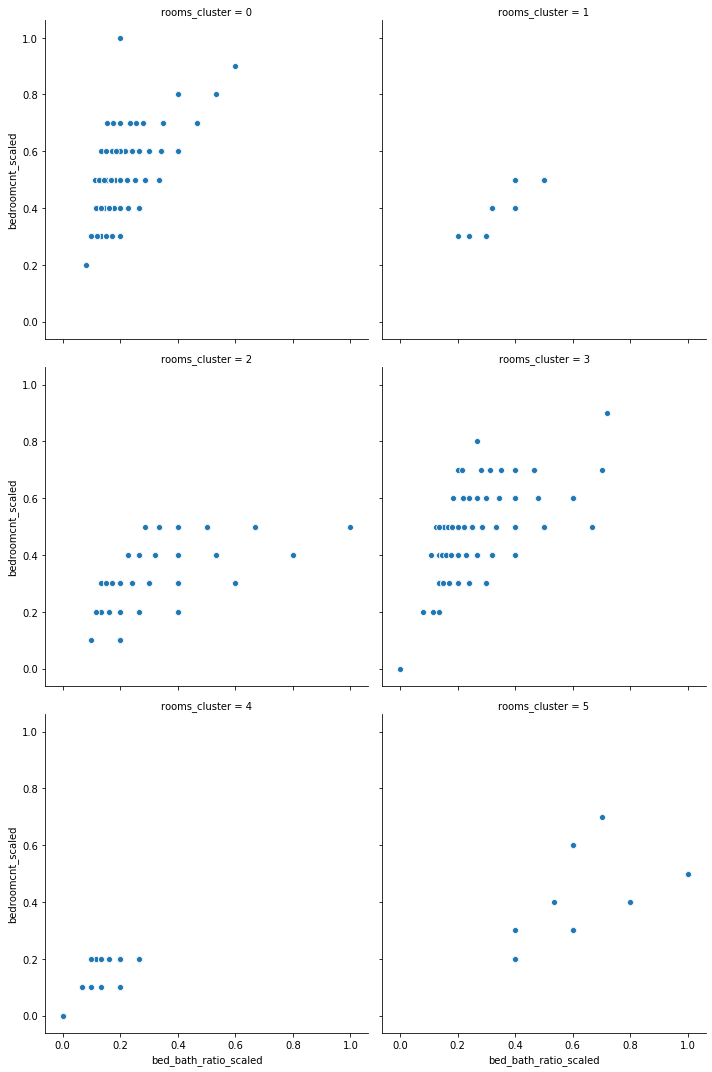

In [27]:
# visualize clusters
sns.relplot(x="bed_bath_ratio_scaled", y="bedroomcnt_scaled", col="rooms_cluster", col_wrap=2, 
            data=X_train_scaled)

#### Cluster 4 = location_cluster     

2nd iteration: add area/location cluster with longitude, latitude, encoded counties?

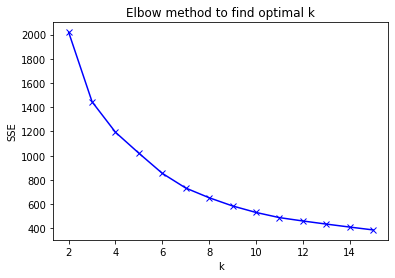

In [28]:
# use longitude, latitude, ages
cluster_vars4 = ['longitude_scaled', 'latitude_scaled', 'age_scaled']
explore.elbow_plot(X_train_scaled, cluster_vars4)
# based on this will use 6 as k value

In [29]:
# set K value, get clusters and view dispersal
k4=6
cluster_col_name4 = 'loc_cluster'
train_clusters4, kmeans4 = explore.run_kmeans(X_train_scaled, X_train, cluster_vars4, k4, cluster_col_name4)
train_clusters4.loc_cluster.value_counts()
# good dispersal of values

1    9674
3    8117
5    5725
2    4311
0    3821
4    3234
Name: loc_cluster, dtype: int64

In [30]:
# get the centroids and add all to train and scaled datasets
centroids4 = explore.get_centroids(kmeans4, cluster_vars4, cluster_col_name4)
X_train, X_train_scaled = explore.add_to_train(X_train, train_clusters4, X_train_scaled, centroids4, cluster_col_name4)
val_trans_clusters4 = explore.kmeans_transform(X_validate_scaled, kmeans4, cluster_vars4, cluster_col_name4)
test_trans_clusters4 = explore.kmeans_transform(X_test_scaled, kmeans4, cluster_vars4, cluster_col_name4)
X_validate, X_validate_scaled = explore.add_to_train(X_validate, val_trans_clusters4, X_validate_scaled, centroids4, cluster_col_name4)
X_test, X_test_scaled = explore.add_to_train(X_test, test_trans_clusters4, X_test_scaled, centroids4, cluster_col_name4)

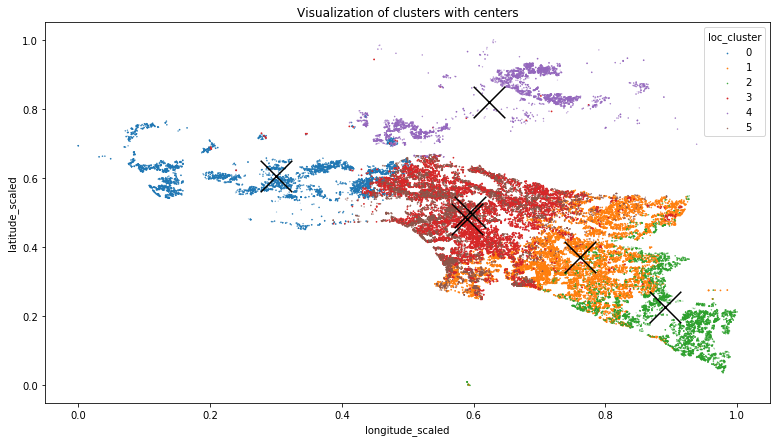

In [31]:
# visualize clusters
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in X_train_scaled.groupby('loc_cluster'):
    ax.scatter(subset.longitude_scaled, subset.latitude_scaled, subset.age_scaled, label=cluster)
ax.legend(title='loc_cluster')
ax.set(ylabel='latitude_scaled', xlabel='longitude_scaled')

X_train_scaled.groupby('loc_cluster').mean().plot.scatter(y='latitude_scaled', x='longitude_scaled', marker='x', s=1000, ax=ax, c='black')
plt.title('Visualization of clusters with centers')
plt.show()

<div class="alert alert-block alert-info">

## Modeling Stage
DELIVERABLES: 
- At least 4 different models are created and their performance is compared
- One model is the distinct combination of algorithm, hyperparameters, and features
- Best practices on data splitting are followed

### Pre-Processing

### Feature Ranking

In [32]:

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import model
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt
from scipy import stats

In [33]:
# try finding best ranking features and limiting features to top 2 or 5?
lm = LinearRegression()
rfe = RFE(lm, 1)
rfe.fit(X_train_scaled, y_train)
ranks = rfe.ranking_
names = X_train_scaled.columns.tolist()
pd.DataFrame({'features': names, 'rank': ranks}).set_index('rank').sort_values('rank')

,features
rank,
1,Orange
2,Ventura
3,LA
4,centroid_taxvaluedollarcnt_scaled
5,centroid_taxamount_scaled
6,centroid_land_dollar_per_sqft_scaled
7,centroid_structure_dollar_per_sqft_scaled
8,centroid_structuretaxvaluedollarcnt_scaled
9,centroid_taxrate_scaled


****
**features takeaway**     
- each county is top 3, will do a model with just those 3
- next features are related to Dollar cluster so will do county with dollar centriods
- then size, then rooms so county with each of those
- one with no centroids
- one with only centroids
****

**Compare stats results of drivers to features rank:**          
bedroomcnt(20), calculatedfinishedsquarefeet(36), fullbathcnt(16), roomcnt(18), taxvaluedollarcnt(11), taxamount(10), LA(3), Orange (1), age(32), taxrate(13), structure_dollar_per_sqft(12), land_dollar_per_sqft(17)    

Did not have a chance to build anonther model based on this info

In [34]:
# all based on X_train_scaled
Xtrains_ALL = X_train_scaled.copy().drop(columns=['size_cluster', 'rooms_cluster', 'dollar_cluster', 
                                                  'loc_cluster'])

Xtrains_noClusters = X_train_scaled[['LA', 'Orange', 'Ventura', 'bedroomcnt_scaled',
       'calculatedfinishedsquarefeet_scaled', 'fullbathcnt_scaled',
       'lotsizesquarefeet_scaled', 'roomcnt_scaled', 'unitcnt_scaled',
       'structuretaxvaluedollarcnt_scaled', 'taxvaluedollarcnt_scaled',
       'taxamount_scaled', 'longitude_scaled', 'latitude_scaled', 'age_scaled',
       'taxrate_scaled', 'structure_dollar_per_sqft_scaled',
       'land_dollar_per_sqft_scaled', 'bed_bath_ratio_scaled']]

Xtrains_only_county = X_train_scaled[['LA', 'Orange', 'Ventura']]

Xtrains_onlyLoc = X_train_scaled[['centroid_longitude_scaled', 'centroid_latitude_scaled',
       'centroid_age_scaled']]

Xtrains_onlyCentroids = X_train_scaled[['centroid_calculatedfinishedsquarefeet_scaled',
       'centroid_lotsizesquarefeet_scaled', 'centroid_structuretaxvaluedollarcnt_scaled',
       'centroid_taxvaluedollarcnt_scaled', 'centroid_taxamount_scaled',
       'centroid_structure_dollar_per_sqft_scaled', 'centroid_land_dollar_per_sqft_scaled', 
        'centroid_taxrate_scaled', 'centroid_bedroomcnt_scaled','centroid_fullbathcnt_scaled', 
        'centroid_roomcnt_scaled', 'centroid_bed_bath_ratio_scaled', 'loc_cluster',
       'centroid_longitude_scaled', 'centroid_latitude_scaled', 'centroid_age_scaled']]

Xtrains_countyDollar = X_train_scaled[['LA', 'Orange', 'Ventura','centroid_structuretaxvaluedollarcnt_scaled',
       'centroid_taxvaluedollarcnt_scaled', 'centroid_taxamount_scaled',
       'centroid_structure_dollar_per_sqft_scaled', 'centroid_land_dollar_per_sqft_scaled', 
        'centroid_taxrate_scaled']]

Xtrains_countySize = X_train_scaled[['LA', 'Orange', 'Ventura', 
                                     'centroid_calculatedfinishedsquarefeet_scaled',
                                     'centroid_lotsizesquarefeet_scaled']]

Xtrains_countyRooms = X_train_scaled[['LA', 'Orange', 'Ventura', 'centroid_bedroomcnt_scaled',
       'centroid_fullbathcnt_scaled', 'centroid_roomcnt_scaled',
       'centroid_bed_bath_ratio_scaled']]

### Train models
***for MVP these are variations on Linear Regression Model altering features**

In [35]:
baseline, basepred = model.get_baseline(y_train)

Baseline: 0.16237765279179564


In [36]:
# create variables for loop
df2test = [Xtrains_ALL, Xtrains_noClusters, Xtrains_only_county, Xtrains_onlyLoc, Xtrains_onlyCentroids, 
           Xtrains_countyDollar, Xtrains_countySize, Xtrains_countyRooms]
target = y_train

# Linear Regression Models
lm_list = []
pred_list = []
RMSE_list = []
for df in df2test:
    lm, pred, RMSE = model.linear_reg_train(df, target)
    
    pred_list.append(pred)
    RMSE_list.append(RMSE)

# LassoLars Models
# this produces same result for all dataframes because this model does feature selection within the model and 
# is selecting the same features from all dataframes
for df in df2test:
    ll_RMSE = model.lasso_lars(df, target)
    
# Tweedie
tweedie = []
for df in df2test:
    tw_RMSE = model.tweedie(df, target)
    tweedie.append(tw_RMSE)

# adjusted the hyperparameter of alpha from .1 to 1 with worse result
# adjusted again to alpha = .001 for these better results

In [37]:
# create dataframe for results of all train models
df_list = ['all', 'no clusters', 'only county', 'only location', 'only centriods',
           'county with dollar', 'county with size', 'county with rooms']

results = pd.DataFrame(df_list, columns=['Features'])
results['LinearReg'] = RMSE_list
results['Tweedie'] = tweedie
results['Baseline'] = baseline
results.sort_values('LinearReg')

,Features,LinearReg,Tweedie,Baseline
0,all,0.161861,0.162026,0.162378
1,no clusters,0.161950,0.162035,0.162378
4,only centriods,0.162086,0.162106,0.162378
6,county with size,0.162222,0.162228,0.162378
7,county with rooms,0.162275,0.162281,0.162378
3,only location,0.162290,0.162291,0.162378
5,county with dollar,0.162310,0.162332,0.162378
2,only county,0.162332,0.162332,0.162378


******
**Take aways from Linear Regression models**     
Model with all features and only clusters performed best. Though not much better than baseline.

**Next Step**     
- try alternate algorithm
*****

******
**Take aways from LassoLars models**     
All match the baseline. Possibly due to how feature selection works in the algorithm

**Next Step**     
- try alternate algorithm
*****

******
**Take aways from Tweedie models**     
These are not an improvement from the Linear Regression models and are very close to baseline in all cases.   
Adjusted hyperparamter alpha from .1 to one and results were slightly worse   
Adjusted to .001 and got slightly better results

**Next Step**     
- Top 3 linear regression models to validate
- will try tweedie on validate if time permits
*****

### Validate

**Best Performing Models**    

Linear Regreession with ALL              
Linear Regreession with no clustering     
Linear Regreession with only centroids       


In [38]:
# create df for scaled validate
Xvals_ALL = X_validate_scaled.copy().drop(columns=['size_cluster', 'rooms_cluster', 'dollar_cluster', 
                                                  'loc_cluster'])
# no clusters
Xvals_noClusters = X_validate_scaled[['LA', 'Orange', 'Ventura', 'bedroomcnt_scaled',
       'calculatedfinishedsquarefeet_scaled', 'fullbathcnt_scaled',
       'lotsizesquarefeet_scaled', 'roomcnt_scaled', 'unitcnt_scaled',
       'structuretaxvaluedollarcnt_scaled', 'taxvaluedollarcnt_scaled',
       'taxamount_scaled', 'longitude_scaled', 'latitude_scaled', 'age_scaled',
       'taxrate_scaled', 'structure_dollar_per_sqft_scaled',
       'land_dollar_per_sqft_scaled', 'bed_bath_ratio_scaled']]

Xvals_onlyCentroids = X_validate_scaled[['centroid_calculatedfinishedsquarefeet_scaled',
       'centroid_lotsizesquarefeet_scaled', 'centroid_structuretaxvaluedollarcnt_scaled',
       'centroid_taxvaluedollarcnt_scaled', 'centroid_taxamount_scaled',
       'centroid_structure_dollar_per_sqft_scaled', 'centroid_land_dollar_per_sqft_scaled', 
        'centroid_taxrate_scaled', 'centroid_bedroomcnt_scaled','centroid_fullbathcnt_scaled', 
        'centroid_roomcnt_scaled', 'centroid_bed_bath_ratio_scaled', 'loc_cluster',
       'centroid_longitude_scaled', 'centroid_latitude_scaled', 'centroid_age_scaled']]



In [39]:
# validate with all
vall_RMSE, vall_pred = model.linear_reg_vt(Xtrains_ALL, Xvals_ALL, y_train, y_validate)
print('validate with all features:', vall_RMSE)

# validate with no clusters
ncl_RMSE, ncl_pred = model.linear_reg_vt(Xtrains_noClusters, Xvals_noClusters, y_train, y_validate)
print('validate with no clusters/centroids:', ncl_RMSE)

# validate with only centroids
ocent_RMSE, ocent_pred = model.linear_reg_vt(Xtrains_onlyCentroids, Xvals_onlyCentroids, y_train, y_validate)
print('validate with only centriods:', ocent_RMSE)

validate with all features: 0.17389179454527254
validate with no clusters/centroids: 0.17393253841221135
validate with only centriods: 0.17402588749239417


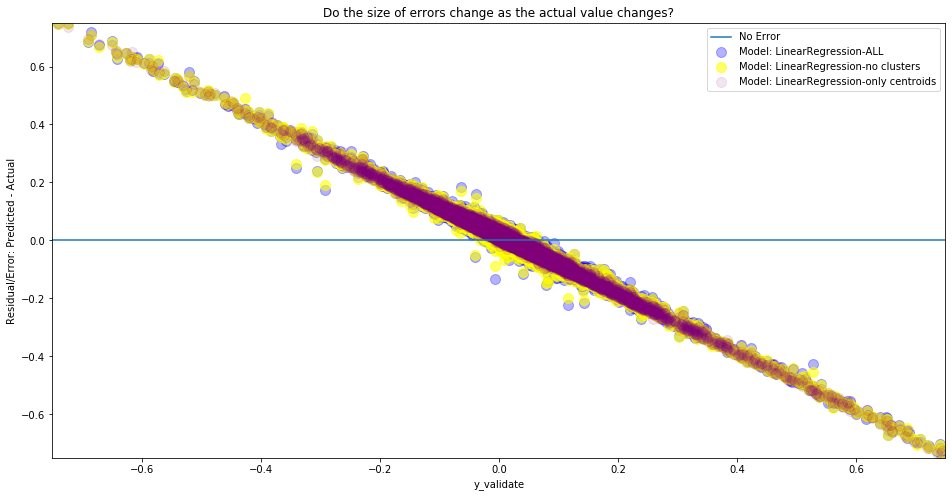

In [40]:
# Plot residuals
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate, vall_pred - y_validate,
            alpha=.3, color="blue", s=100, label="Model: LinearRegression-ALL")
plt.scatter(y_validate, ncl_pred - y_validate, 
            alpha=.6, color="yellow", s=100, label="Model: LinearRegression-no clusters")
plt.scatter(y_validate, ocent_pred - y_validate, 
            alpha=.1, color="purple", s=100, label="Model: LinearRegression-only centroids")
plt.legend()
plt.xlabel("y_validate")
plt.ylabel("Residual/Error: Predicted - Actual")
plt.title("Do the size of errors change as the actual value changes?")
plt.xlim(-.75, .75)
plt.ylim(-.75, .75)
plt.show()

In [41]:
# make a baseline from train mean that is the same shape as validate
rows_needed = y_validate.shape[0]
# create array of predictions of same size as y_train.logerror based on the mean
vy_hat = np.full(rows_needed, np.mean(y_train))

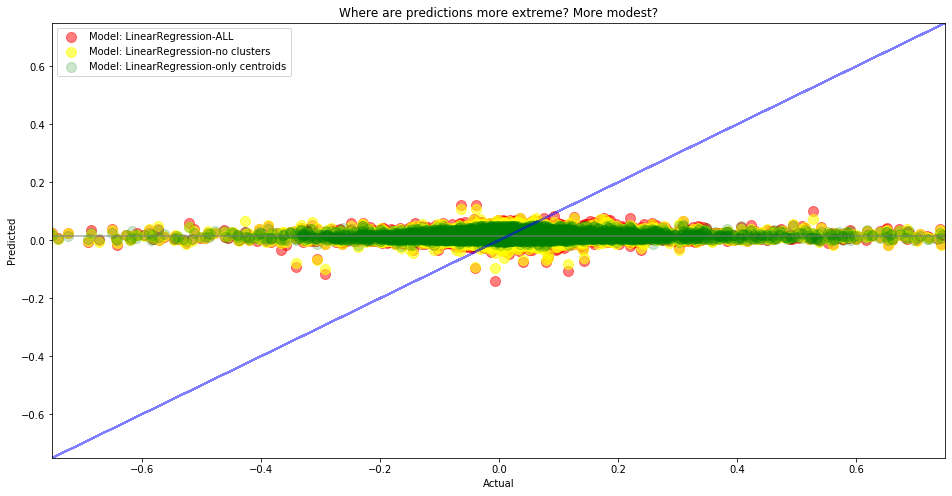

In [42]:
# Visualize predictions vs y_validate
plt.figure(figsize=(16,8))
plt.plot(y_validate, vy_hat, alpha=.5, color="gray", label='_nolegend_')
#plt.annotate("Baseline: Predict Using Mean", (-3, 3))
plt.plot(y_validate, y_validate, alpha=.5, color="blue", label='_nolegend_')
#plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate, vall_pred, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression-ALL")
plt.scatter(y_validate, ncl_pred, 
            alpha=.6, color="yellow", s=100, label="Model: LinearRegression-no clusters")
plt.scatter(y_validate, ocent_pred, 
            alpha=.2, color="green", s=100, label="Model: LinearRegression-only centroids")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Where are predictions more extreme? More modest?")
plt.xlim(-.75, .75)
plt.ylim(-.75, .75)
plt.show()

******
**Take aways from Validate**     
None of these beat baseline. Possibly due to how feature selection works in the algorithm
- tried reducing outliers
- tried stratify on fips
- reduced # features in models

**Next Step**     
- redo import of dataset to create feature that is "extras" garage, pool, fireplace, spa, shed, etc
- isolate by county
*****

### Test

**None of the models beat the baseline during validate**      

Conducting test on best perfoming from validate run:
- Linear Regression on all features

In [43]:
# create df for scaled test
Xtests_ALL = X_test_scaled.copy().drop(columns=['size_cluster', 'rooms_cluster', 'dollar_cluster', 
                                                  'loc_cluster'])

In [44]:
# run all features on test
tall_RMSE, tall_pred = model.linear_reg_vt(Xtrains_ALL, Xtests_ALL, y_train, y_test)
print('test with all:', tall_RMSE)

# Avg. Error = (Validate Error + Test Error) /2 - Average preformance of model works on unseen data
model_error = round((vall_RMSE + tall_RMSE) / 2 , 6)
print(f'The average error for our model is {model_error}')

# Calcuating % improvement
# First: work out the difference (increase) between the two numbers you are comparing
difference = (baseline - tall_RMSE)
# Then: divide the increase by the original number and multiply the answer by 100
percent_improve = round((difference / baseline) * 100, 2)
print(f'The % improvement for our model is {percent_improve}%')

test with all: 0.1682152100879427
The average error for our model is 0.171054
The % improvement for our model is -3.6%


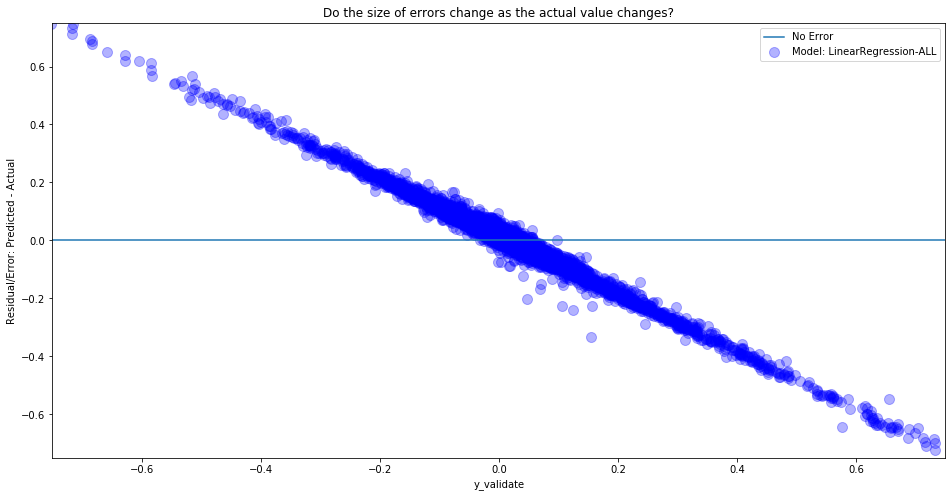

In [45]:
# Plot residuals
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_test, tall_pred - y_test,
            alpha=.3, color="blue", s=100, label="Model: LinearRegression-ALL")
plt.legend()
plt.xlabel("y_validate")
plt.ylabel("Residual/Error: Predicted - Actual")
plt.title("Do the size of errors change as the actual value changes?")
plt.xlim(-.75, .75)
plt.ylim(-.75, .75)
plt.show()

In [46]:
# make a baseline from train mean that is the same shape as test
rows_needed = y_test.shape[0]
# create array of predictions of same size as y_train.logerror based on the mean
ty_hat = np.full(rows_needed, np.mean(y_train))

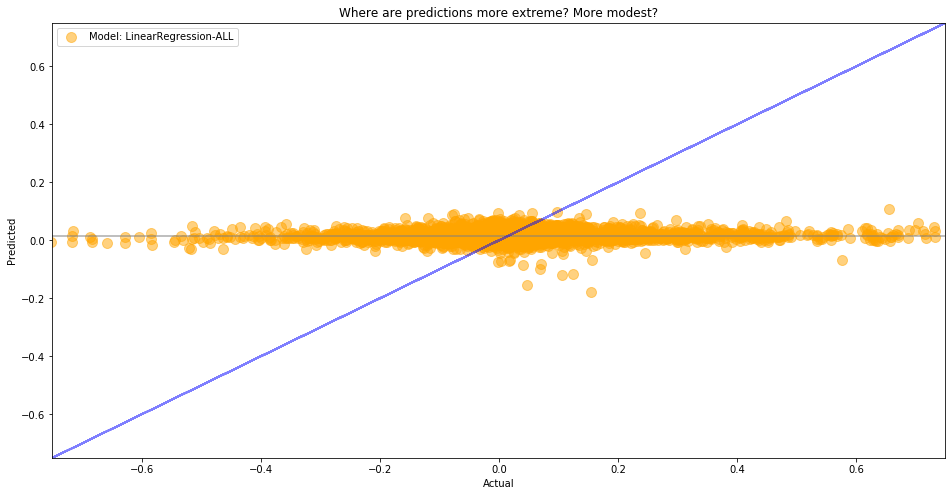

In [47]:
# Visualize predictions vs y_validate
plt.figure(figsize=(16,8))
plt.plot(y_test, ty_hat, alpha=.5, color="gray", label='_nolegend_')
#plt.annotate("Baseline: Predict Using Mean", (-3, 3))
plt.plot(y_test, y_test, alpha=.5, color="blue", label='_nolegend_')
#plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_test, tall_pred, 
            alpha=.5, color="orange", s=100, label="Model: LinearRegression-ALL")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Where are predictions more extreme? More modest?")
plt.xlim(-.75, .75)
plt.ylim(-.75, .75)
plt.show()

## Delivery Stage
DELIVERABLES:
- [Final_Notebook](https://github.com/RyvynYoung/Zillow_Clustering_Project/blob/main/Final.ipynb)
- walk through of notebook


### Summary of findings
##### Hypotheses Testing Results
- found difference in average log error by county significant
    - further testing showed LA and Orange counity averages are significantly different, as well as Orange and Ventura counties, but LA and Ventura are not significantly different
- Pearson's R showed statistically significant relationships between logerror and the following variables
    - bedroomcnt, calculatedfinishedsquarefeet, fullbathcnt, roomcnt, taxvaluedollarcnt, taxamount, LA, Orange, age, taxrate, structure_dollar_per_sqft, land_dollar_per_sqft
    - but these do not necessarily score as best features when using RFE to evaluate
- Statistical testing showed there is a relationship between age and calculated finished sqft, but it is a weak relationship and removing it did not impact the model
- Bedroom/Bathroom ratio and age were binned during explore to create categorical values to test, these showed that these are dependant on each other

### Top perfoming model
- None of the models performed better than baseline on the validate or test datasets
- The best model was a Linear Regression using all features (excludes cluster names)
    - result is 3.6% worse than baseline
- This is after many iterations, stratifying by fips added, number of features in model added, further reduced outliers left in dataset, reduced clusters to a max of 3 per grouping with no change in results

### Next Steps
- redo import of dataset to create feature that is "extras" garage, pool, fireplace, spa, shed, etc
- isolate by county
- additional data to get: school district ratings by county, distance of property from beach
- polynomial models tested well on train but were extremly overfit, maybe retry?


<div class="alert alert-block alert-info"><b>